# Algorytmy Macierzowe
## Zadanie 4: Eliminacja Gaussa macierzy rzadkich
## Autorzy: Jan Izydorczyk, Aleksander Wójtowicz

# Cel zadania
Celem zadania było wykonanie eksperymentu polegającego na przetestowaniu czasu wykonania eliminacji Gaussa macierzy rzadkich, w zależności od ich reprezentacji. 

W zadanym problemie testowaliśmy kombinacje:
- Reprezentacja gęsta, używając naiwnego algorytmu
- Reprezentacja Coordinate System
- Reprezentacja gęsta, używając algorytmu z przerwaniem dla zerowych kolumn

# Wybór macierzy

Do przeprowadzenia eksperymentów wybraliśmy zadane macierze:
- `massmatrix(0, 18, 2, 0)` rozmiar: $400 \times 400$
- `massmatrix(1, 13, 3, 0)` rozmiar: $784 \times 784$
- `massmatrix(1, 22, 3, 0)` rozmiar: $2116 \times 2116$
- `massmatrix(1, 28, 3, 0)` rozmiar: $3364 \times 3364$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import iface

In [2]:
matrices_parameters = [
    [0, 18, 2, 0],
    [1, 13, 3, 0],
    [1, 22, 3, 0],
    [1, 28, 3, 0],
]

In [3]:
def load_base_matrix(parameters: list[str]):  
    filename = ','.join(map(str, parameters)) + '.csv'
    with open(filename, 'r') as file:
        return iface.read_matrix(file)


In [4]:
matrices = [load_base_matrix(parameters) for parameters in matrices_parameters]

In [33]:
shapes = [m.shape for m in matrices]

matrices_titles = [f'Macierz ${shape[0]}\\times{shape[1]}$\n$massmatrix({", ".join(map(str, parameters))})$' for shape, parameters in zip(shapes, matrices_parameters)]

# Wizualizacja macierzy

## Macierze wejściowe

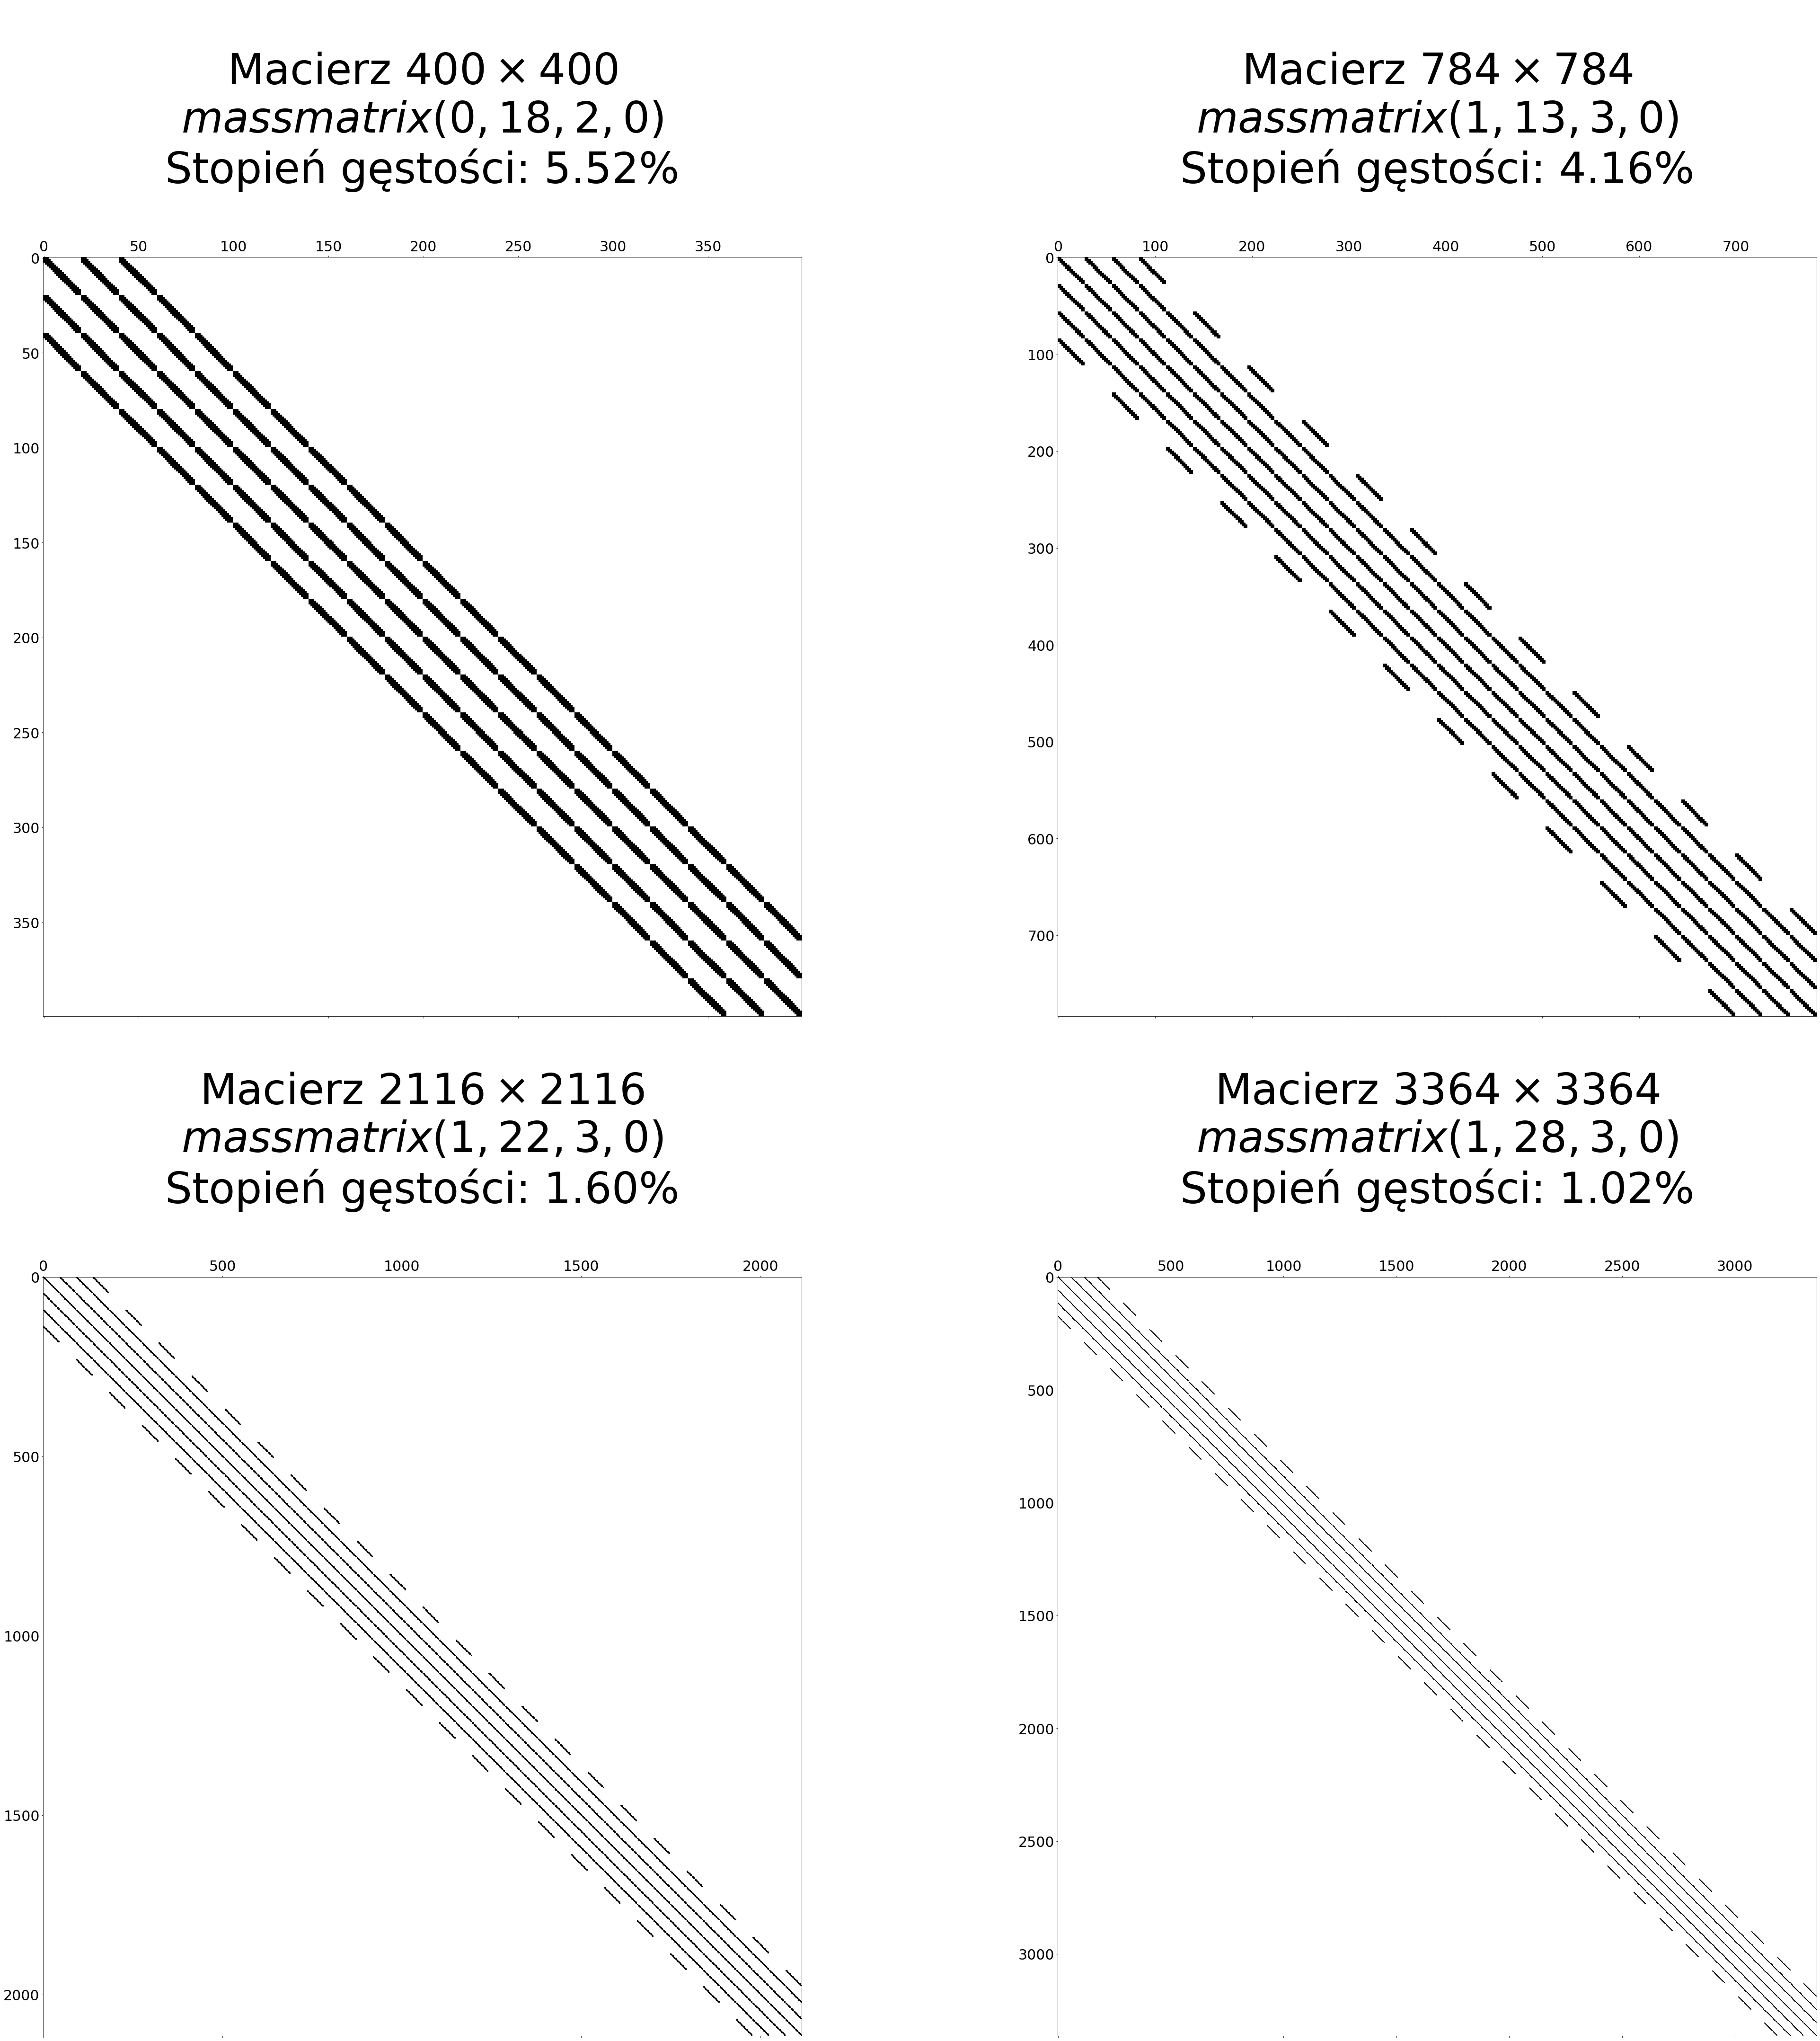

In [5]:
fig, axs = plt.subplots(2, 2, figsize = (60, 60))
axs = axs.flatten()

for ax, matrix, title in zip(axs, matrices, matrices_titles):
    density = np.count_nonzero(matrix) / matrix.shape[0] / matrix.shape[1]
    ax.spy(matrix)
    ax.set_title(f'\n{title}\nStopień gęstości: {100*density:.2f}%\n', fontsize=90)
    ax.tick_params(axis='both', labelsize=30)

fig.tight_layout()
plt.show()

In [21]:
el_matrices = [iface.calc(matrix, 'dense_skip')[1] for matrix in matrices]

## Macierze po wykonaniu eliminacji

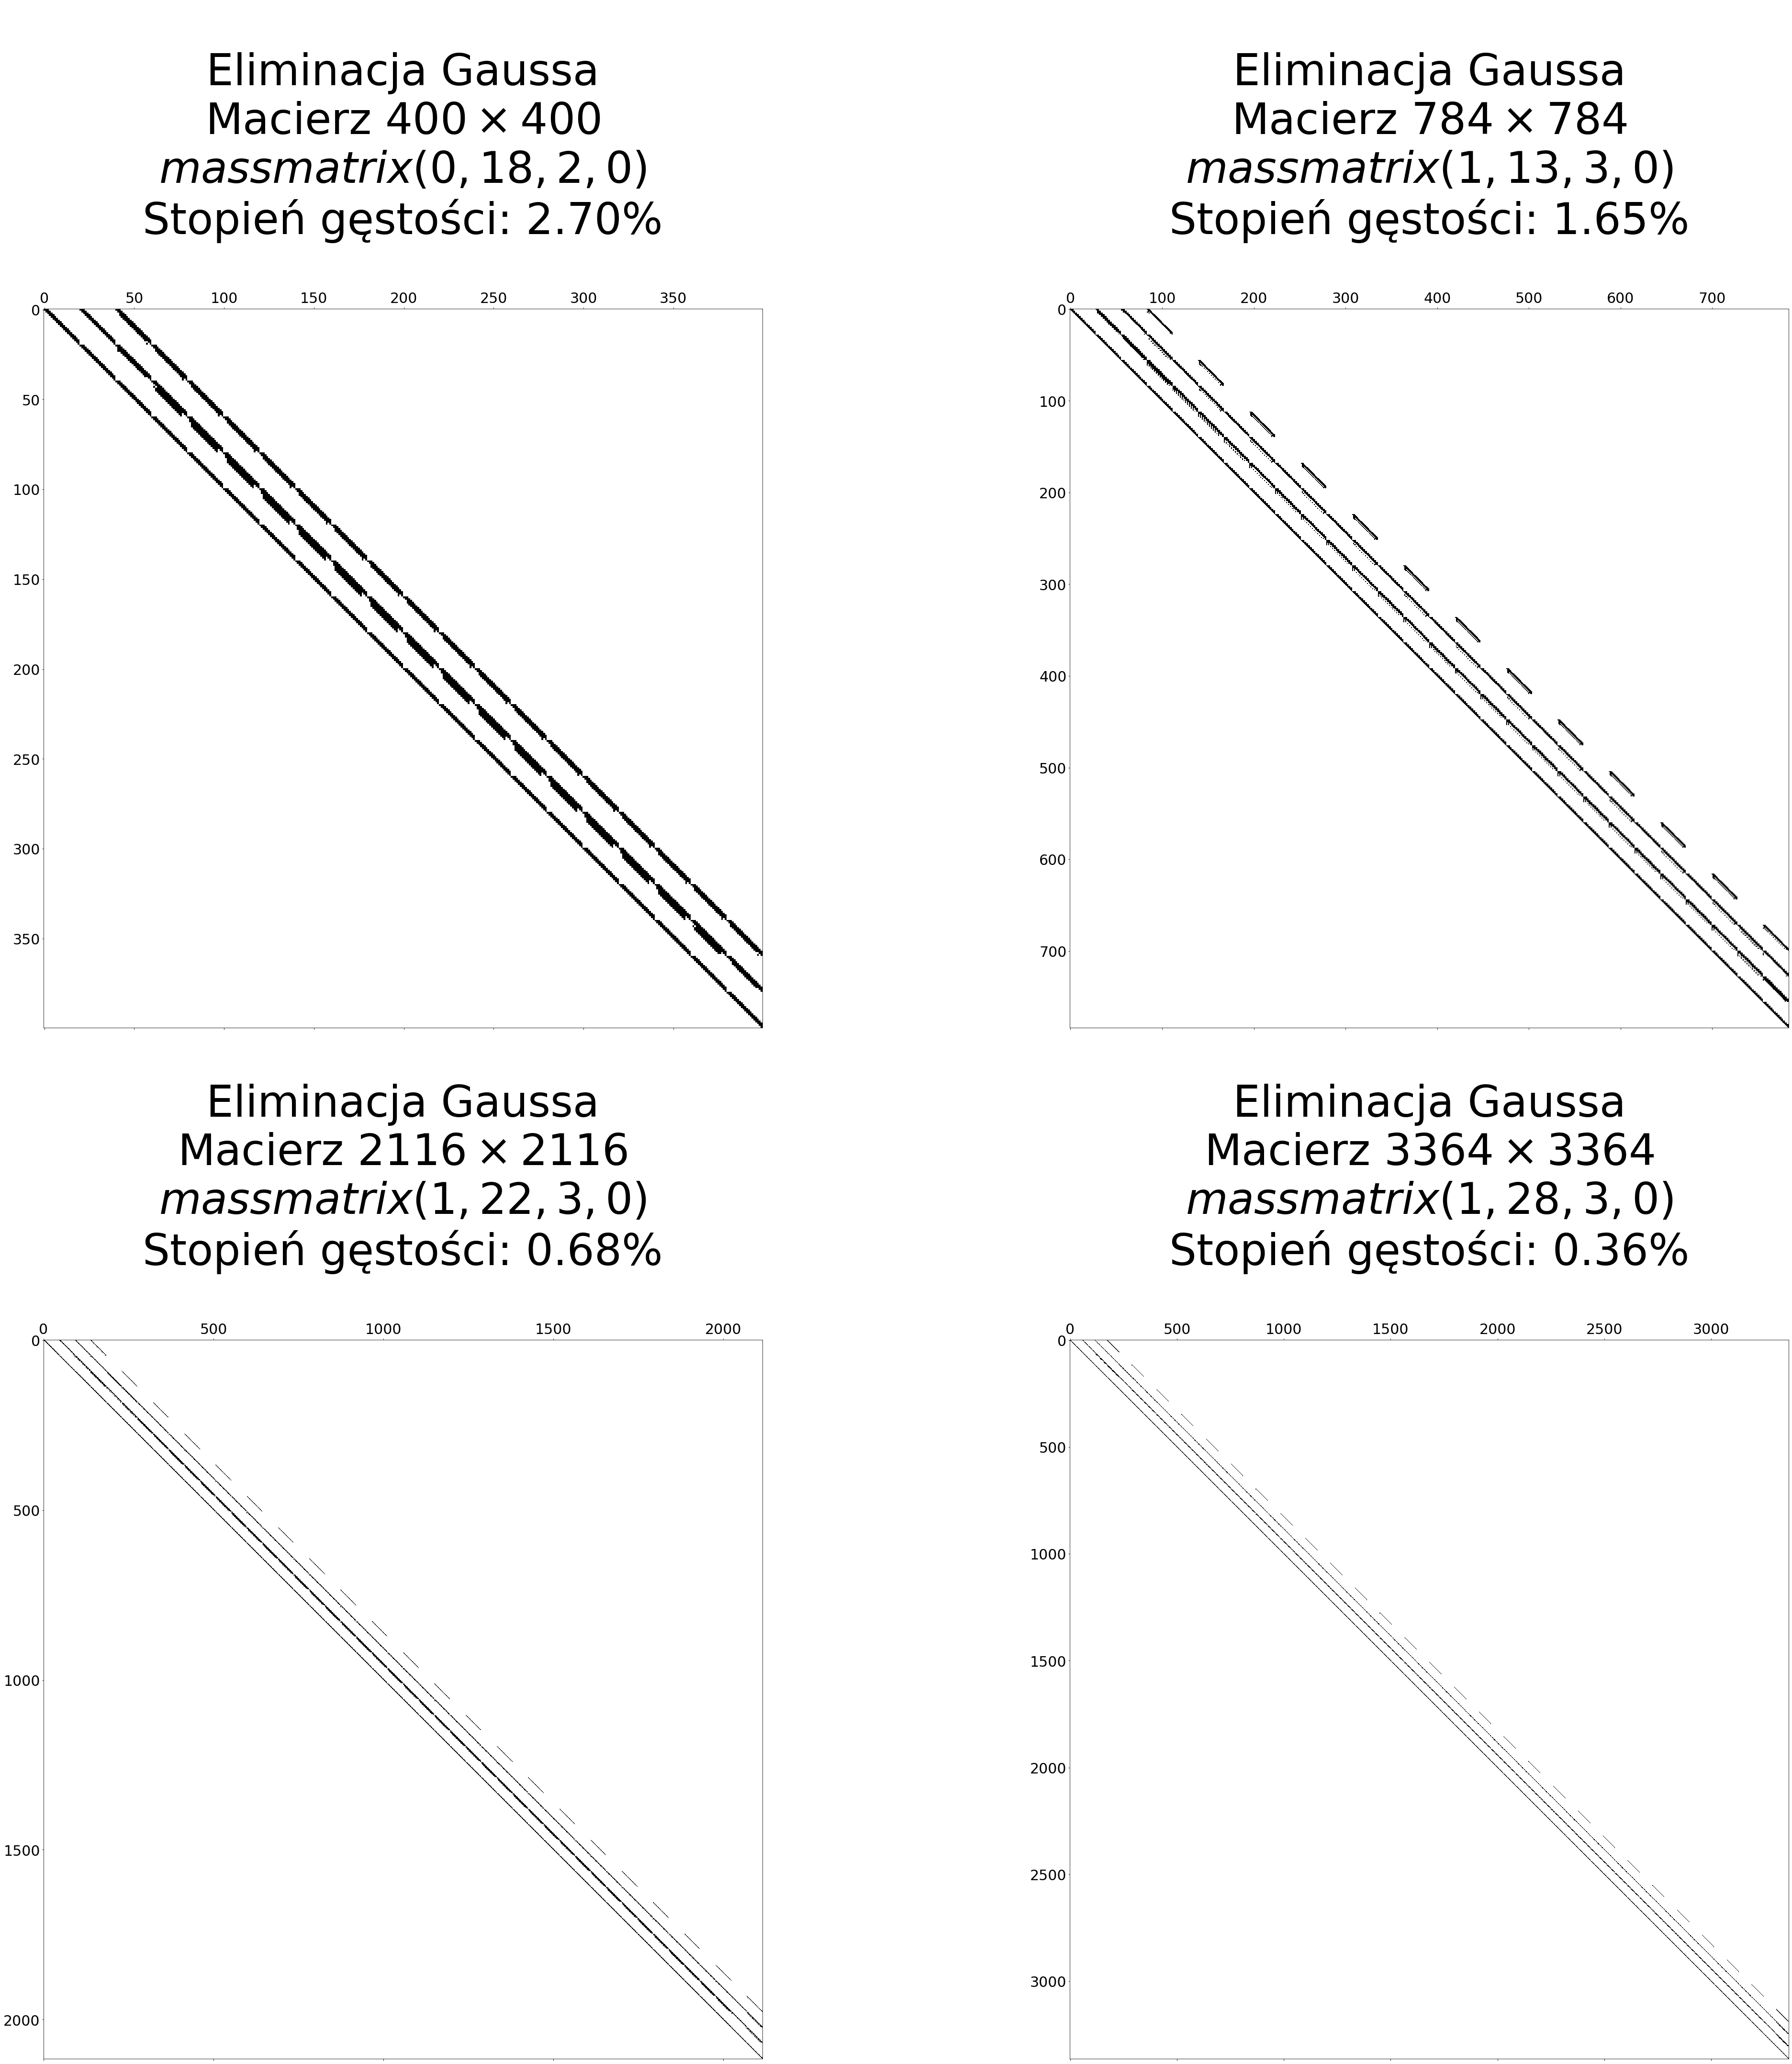

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (60, 60))
axs = axs.flatten()

for ax, matrix, title in zip(axs, el_matrices, matrices_titles):
    density = np.count_nonzero(matrix) / matrix.shape[0] / matrix.shape[1]
    ax.spy(matrix)
    ax.set_title(f'\nEliminacja Gaussa\n{title}\nStopień gęstości: {100*density:.2f}%\n', fontsize=90)
    ax.tick_params(axis='both', labelsize=30)

fig.tight_layout()
plt.show()

In [6]:
from iface import calc
methods = [
    'dense',
    'coord',
    'dense_skip',
]


def measure_time(matrices=matrices, tries=1):
    res_df = []
    for idx, matrix in enumerate( matrices ):
        for method in methods:
            sum_time_calc = 0
            for _ in range(tries):
                time_calc, _ = calc(matrix, method)
                sum_time_calc += time_calc
            avg_time_calc = sum_time_calc / tries
            res_df.append([idx, method, avg_time_calc])
            print(f'Matrix {idx}, {method}: calculation - {avg_time_calc: .2f}s')
    res = pd.DataFrame(res_df, columns=('matrix', 'method', 'avg_time_calc'))
    return res

In [7]:
import os
force_recalculations = False
results_filename = 'results.csv' 
if not os.path.exists(results_filename) or force_recalculations:
    res_df = res_df = measure_time(matrices, tries=2)
    res_df.to_csv(results_filename)
else:
    res_df = pd.read_csv(results_filename, index_col = 0)

In [8]:
res_df = res_df.set_index(['method', 'matrix'])

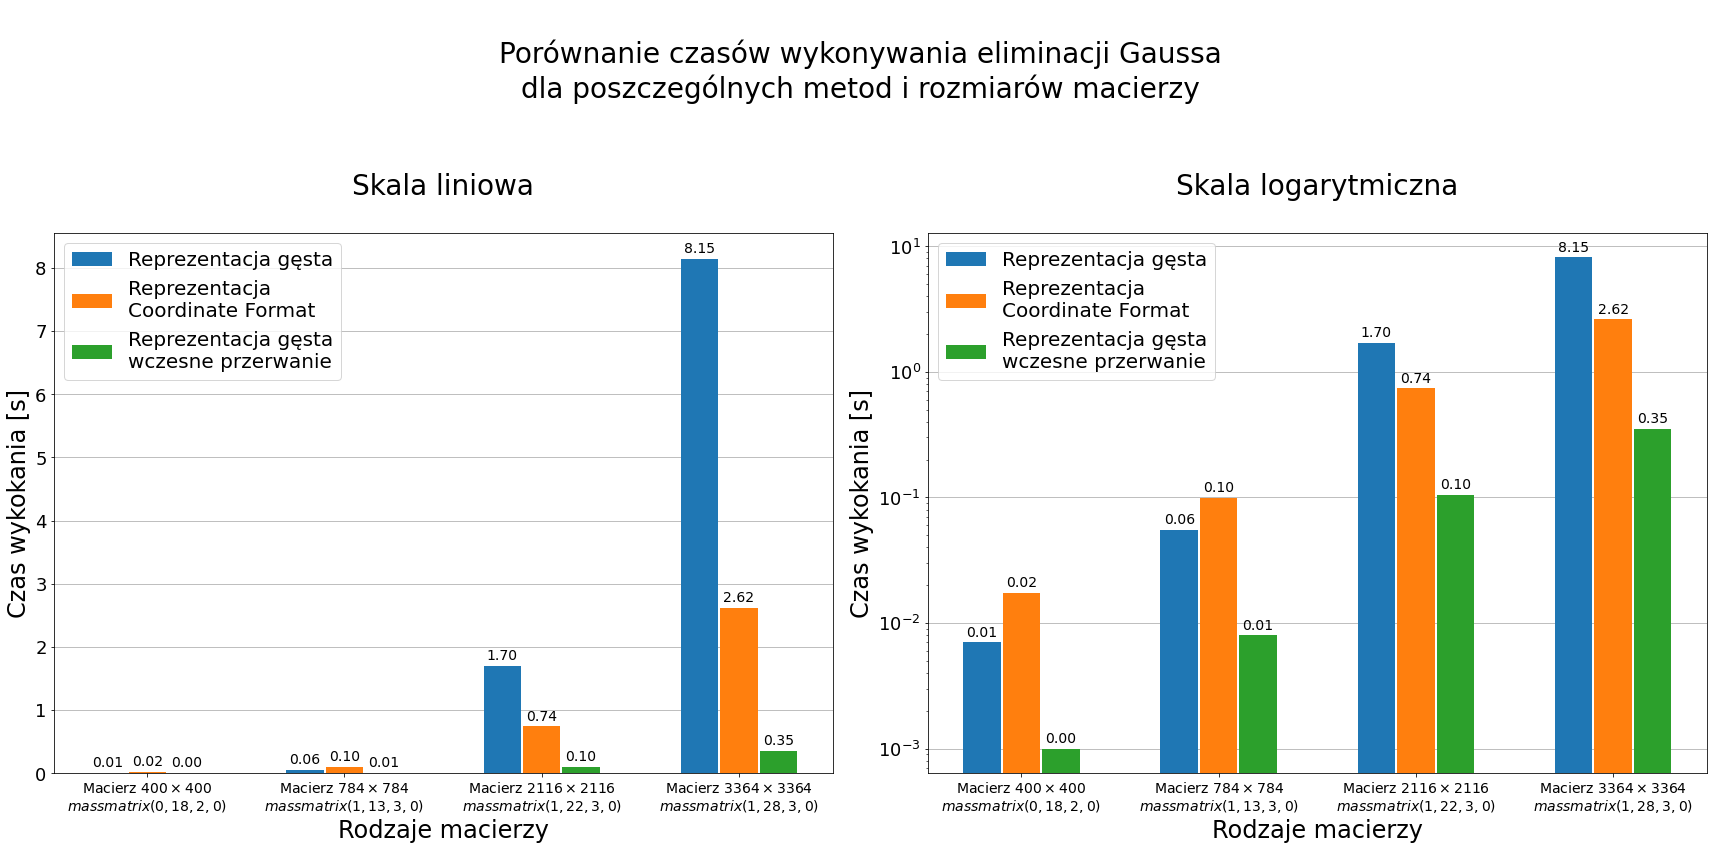

In [35]:
labels = matrices_titles
fig, axs = plt.subplots(1, 2, figsize=(12 * 2, 12))
axs = axs.flatten()
scales = ['linear', 'log']
width = 0.2  #
padding = 0.01
x = np.arange(len(labels))  # the label locations

x_pos = -width
methods_repr = [
    'Reprezentacja gęsta',
    'Reprezentacja\nCoordinate Format',
    'Reprezentacja gęsta\nwczesne przerwanie',
]

scale_repr = {
    'linear': 'liniowa',
    'log': 'logarytmiczna',
}

shifts = np.linspace(-width * len(methods) / 2, width * len(methods) / 2, len(methods), endpoint=False) + width / 2

for ax, scale in zip(axs, scales):

    for method, method_repr, shift in zip(methods, methods_repr, shifts):
        ys = res_df.loc[method, :].to_numpy().flatten()
        rects = ax.bar(x + shift, ys, width - padding, label=method_repr, zorder=3)
        ax.bar_label(rects, padding=3, labels=[f'{y:.2f}' for y in ys], fontsize=14)
        x_pos += width

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(f'\nSkala {scale_repr[scale]}\n', fontsize=28)
    ax.set_ylabel('Czas wykokania [s]', fontsize=24)
    ax.set_xlabel('Rodzaje macierzy', fontsize=24)
    ax.set_xticks(x, labels)
    ax.set_yscale(scale)
    ax.legend(fontsize=20)
    ax.tick_params(axis='y', labelsize=18)
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(zorder=-3, axis='y')

title = 'Porównanie czasów wykonywania eliminacji Gaussa\ndla poszczególnych metod i rozmiarów macierzy'
fig.suptitle(f'\n{title}\n', fontsize=28)
fig.tight_layout()

plt.show()